# Results visualization

## packages

In [1]:
import seaborn as sns
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import sys

In [2]:
print(os.getcwd())

C:\Users\Administrator-1\Desktop\New folder (6)\HI\ML\Experiment_4_10trails


In [3]:
sns.set(style = "whitegrid")

# Path

In [4]:
path =  os.getcwd()+"\\training_process\\"

# Methods

In [5]:
def plot_vali(x,title):
    x = x[:,1]
    plt.figure(figsize=(7,5))
    plt.title(f'validation performance for {title}')
    plt.plot(x, label='validation MSE',marker='o')
    plt.plot([], [], ' ', label=f"mean={round(np.mean(x),6)}")
    plt.plot([], [], ' ', label=f"std={round(np.std(x),6)}")
    plt.xticks([0,1,2,3,4,5,6,7,8,9])
    plt.grid()
    plt.xlabel('Trail')
    plt.ylabel('MSE')
    plt.grid()
    plt.legend()
    plt.show()
    print("validation mean=",np.mean(x))
    print("validation std=",np.std(x))

In [6]:
def plot_test(x,title):
    x = x[:,2]
    plt.figure(figsize=(7,5))
    plt.title(f'testing performance for {title}')
    plt.plot(x, label='testing MSE',marker='o')
    plt.plot([], [], ' ', label=f"mean={round(np.mean(x),6)}")
    plt.plot([], [], ' ', label=f"std={round(np.std(x),6)}")
    plt.xticks([0,1,2,3,4,5,6,7,8,9])
    plt.grid()
    plt.xlabel('Trail')
    plt.ylabel('MSE')
    plt.legend()
    plt.grid()
    plt.show()
    print("test mean=",np.mean(x))
    print("test std=",np.std(x))

In [7]:
def plot_vali_test(x,title):
    x1 = x[:, 1]
    x2 = x[:, 2]
    plt.figure(figsize=(7,5))
    plt.title(f'Testing and validation for {title}')
    plt.plot(x1, label='validation MSE',marker='o')
    plt.plot(x2, label='testing MSE',marker='o')
    #plt.plot([], [], ' ', label=f"mean={round(np.mean(x),6)}")
    #plt.plot([], [], ' ', label=f"std={round(np.std(x),6)}")
    plt.xticks([0,1,2,3,4,5,6,7,8,9])
    plt.grid()
    plt.xlabel('Trail')
    plt.ylabel('MSE')
    plt.legend()
    plt.grid()
    plt.show()
    #print("validation mean=",np.mean(x))
    #print("validation std=",np.std(x))

In [8]:
def vali_mse_comparison(mse_dict):
    plt.figure(figsize=(7,5))
    for x,y in mse_dict.items():
        y = y.to_numpy(copy=True)
        y = y[:,1]
        plt.plot(y, label=x,marker='o')
        plt.grid()
    plt.xticks([0,1,2,3,4,5,6,7,8,9])
    plt.title(f'validation MSE by different representations')
    plt.xlabel('Trail')
    plt.ylabel('MSE')
    plt.legend(prop={'size': 8})
    

In [9]:
def test_mse_comparison(mse_dict):
    plt.figure(figsize=(7,5))
    for x,y in mse_dict.items():
        y= y.to_numpy(copy=True)
        y = y[:,2]
        plt.plot(y, label=x,marker='o')
    plt.grid()
    plt.xticks([0,1,2,3,4,5,6,7,8,9])
    plt.title(f'testing MSE by different representations')
    plt.xlabel('Trail')
    plt.ylabel('MSE')
    plt.grid()
    plt.legend(prop={'size': 8})

In [17]:
def swarmplot_vali(dictt, rotation, fontsize):
    plt.figure(figsize=(10,5))
    A = []
    labelss = []
    for x,y in dictt.items():
        y= y.to_numpy(copy=True)
        y = y[:,1]
        A.append(y)
        labelss.append(x)
    ax = sns.swarmplot(A)
    ax.grid()
    if(rotation==45):
        ax.set_xticklabels(labelss, rotation=rotation, fontsize = fontsize,ha='right', rotation_mode='anchor')
    else:
        ax.set_xticklabels(labelss, rotation=rotation, fontsize = fontsize)
    plt.title(f'validation MSE')
    plt.ylabel('MSE')
    plt.show()

In [18]:
def swarmplot_test(dictt, rotation,fontsize):
    plt.figure(figsize=(10,5))
    A = []
    labelss = []
    for x,y in dictt.items():
        y= y.to_numpy(copy=True)
        y = y[:,2]
        A.append(y)
        labelss.append(x)
    ax = sns.swarmplot(A)
    ax.grid()
    if(rotation==45):
        ax.set_xticklabels(labelss, rotation=rotation, fontsize = fontsize,ha='right', rotation_mode='anchor')
    else:
        ax.set_xticklabels(labelss, rotation=rotation, fontsize = fontsize)
    plt.title(f'testing MSE')
    plt.ylabel('MSE')
    plt.show()

# Read CSV

In [12]:
index_concate = pd.read_csv(path + "index_concate.csv")
original_vector = pd.read_csv(path+"original_vector.csv")
polynomial_concate = pd.read_csv(path+ "poly_concate.csv")
index_add = pd.read_csv(path+ "index_add.csv")
learnable_add = pd.read_csv(path+ "learnable_PEV.csv")
sinusoidal_add = pd.read_csv(path+ "sin_add.csv")
sinusoidal_concatenate = pd.read_csv(path+ "sin_concate.csv")

In [13]:
original_vector_CNN = pd.read_csv(path+"original_vector_CNN.csv")

## PART 1: Different data representations on transformer.

In [24]:
mse_dict = {
    "original_vector": original_vector,
    "index_PEV_concate": index_concate,
    "index_PEV_add": index_add, 
    "sinusoidal_PEV_concate":sinusoidal_concatenate,
    "sinusoidal_PEV_add":sinusoidal_add, 
    "polynomial_PEV_concate": polynomial_concate,
    "trainable_PEV_add":learnable_add,
}

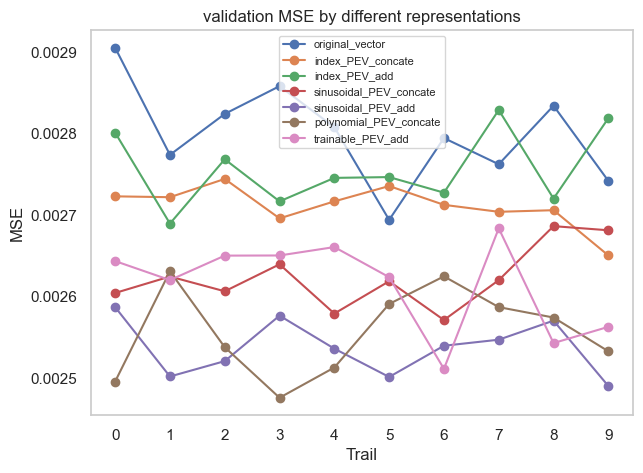

In [25]:
vali_mse_comparison(mse_dict)

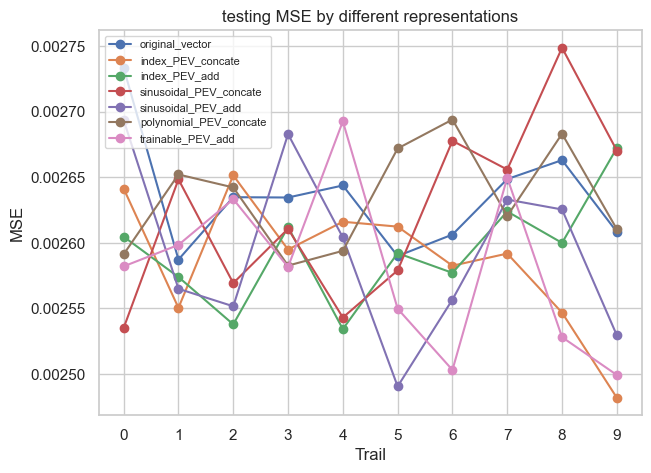

In [26]:
test_mse_comparison(mse_dict)

C:\Users\Administrator-1\AppData\Local\Temp\ipykernel_4400\1205405488.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labelss, rotation=rotation, fontsize = fontsize,ha='right', rotation_mode='anchor')


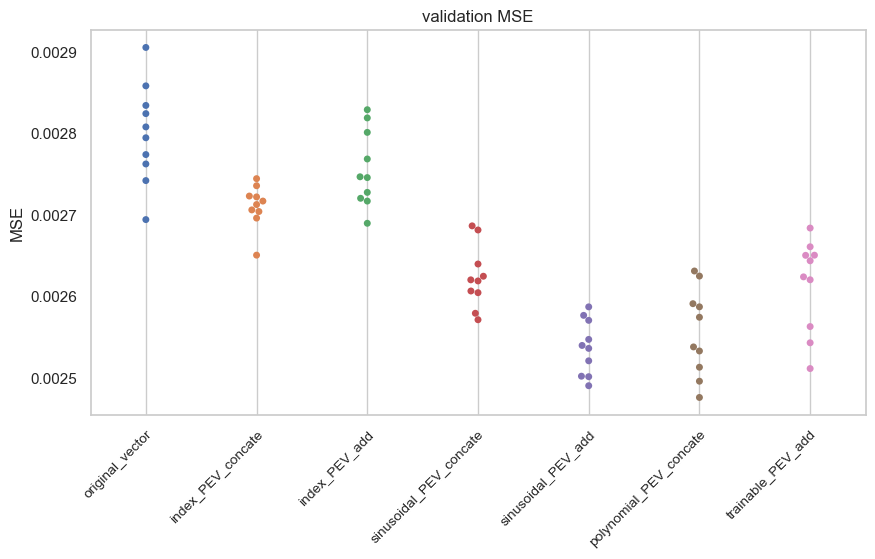

In [27]:
swarmplot_vali(mse_dict, 45, 10)

C:\Users\Administrator-1\AppData\Local\Temp\ipykernel_4400\1636817464.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labelss, rotation=rotation, fontsize = fontsize,ha='right', rotation_mode='anchor')


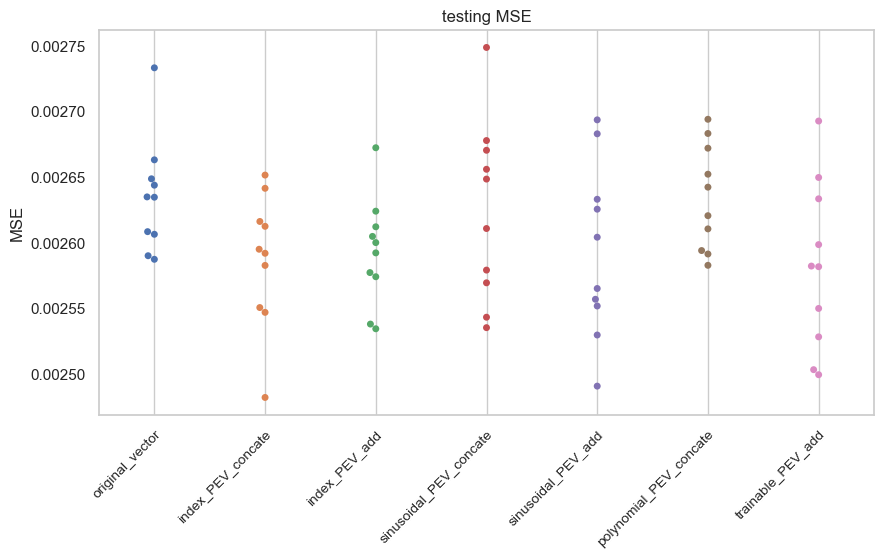

In [28]:
swarmplot_test(mse_dict, 45, 10)

### The mean and std of each representations

In [29]:
def get_mean_std(x):
    return np.mean(x), np.std(x)

In [30]:
print("validation performance")
for x,y in mse_dict.items():
    y = y.to_numpy(copy=True)
    validation_mse = y[:,1]
    test_mse = y[:,2] 
    m1 ,s1 = get_mean_std(validation_mse)
    m2 ,s2 = get_mean_std(test_mse)
    print(f" mean={m1:.6f}, std={s1:.6f}  for {x}")

validation performance
 mean=0.002800, std=0.000057  for original_vector
 mean=0.002711, std=0.000024  for index_PEV_concate
 mean=0.002757, std=0.000044  for index_PEV_add
 mean=0.002624, std=0.000036  for sinusoidal_PEV_concate
 mean=0.002537, std=0.000032  for sinusoidal_PEV_add
 mean=0.002557, std=0.000051  for polynomial_PEV_concate
 mean=0.002615, std=0.000054  for trainable_PEV_add


In [31]:
print("testing performance")
for x,y in mse_dict.items():
    y = y.to_numpy(copy=True)
    test_mse = y[:,2] 
    m1 ,s1 = get_mean_std(test_mse)
    print(f" mean={m1:.6f}, std={s1:.6f}  for {x}")

testing performance
 mean=0.002635, std=0.000041  for original_vector
 mean=0.002587, std=0.000048  for index_PEV_concate
 mean=0.002593, std=0.000039  for index_PEV_add
 mean=0.002624, std=0.000065  for sinusoidal_PEV_concate
 mean=0.002593, std=0.000063  for sinusoidal_PEV_add
 mean=0.002634, std=0.000038  for polynomial_PEV_concate
 mean=0.002582, std=0.000061  for trainable_PEV_add


### Ablation study for CNN vs CNN-transformer

In [23]:
mse_dict = {
    "CNN-transformer no LEP": original_vector,
    'CNN': original_vector_CNN
    
}

C:\Users\Administrator-1\AppData\Local\Temp\ipykernel_14188\1266501540.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labelss, rotation=rotation, fontsize = fontsize)


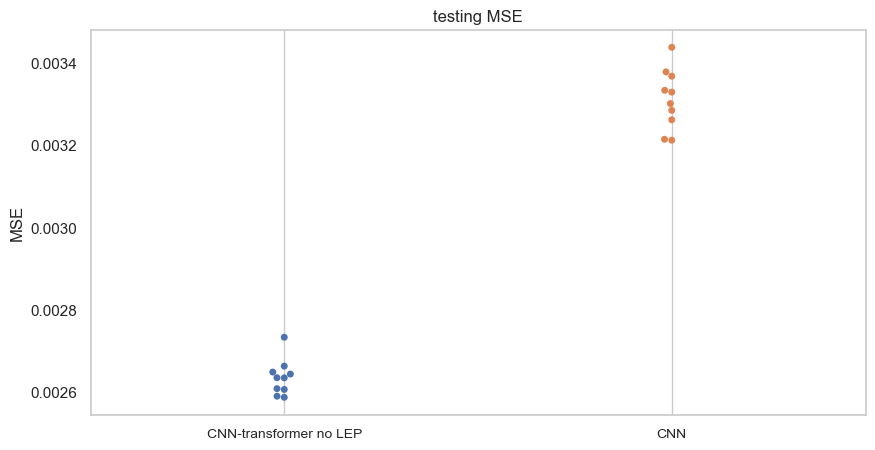

In [24]:
swarmplot_test(mse_dict, 0, 10)

C:\Users\Administrator-1\AppData\Local\Temp\ipykernel_14188\2652390541.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labelss, rotation=rotation, fontsize = fontsize)


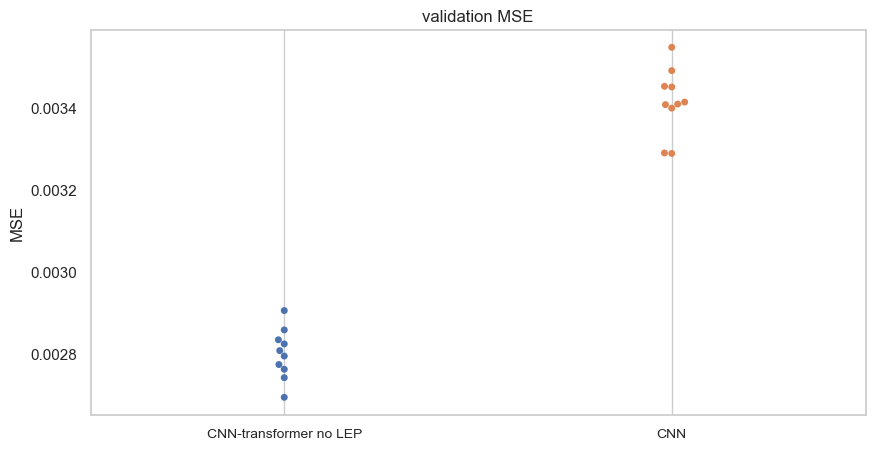

In [25]:
swarmplot_vali(mse_dict, 0, 10)

### converge speed 

In [34]:
def plott_mean(dictt, ti, mode):
    plt.figure(figsize=(10,5))
    for x, y in dictt.items():
        index = 0
        y = np.array(y)
        fina = np.zeros((60,))
        if(mode=='train'):
            y = y[:, 1]
        elif(mode=='vali'):
            y = y[:, 2]
        else:
            y = y[:, 3]
        for i in range(0, 10):
            t = y[index: index+60]
            fina = fina + (t*0.1)
            index=index+60
        plt.plot(t, label=f'{x}')
        plt.grid()
    plt.title(f'{mode} MSE mean')
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.legend()
    plt.show()

In [35]:
CNN_transformer = pd.read_csv(path+"original_vector_process.csv")
CNN = pd.read_csv(path+"original_vector_process_cnn.csv")

In [40]:
dicct_origin = {
    'CNN-transformer no LPE': CNN_transformer,
    'CNN':CNN,
}

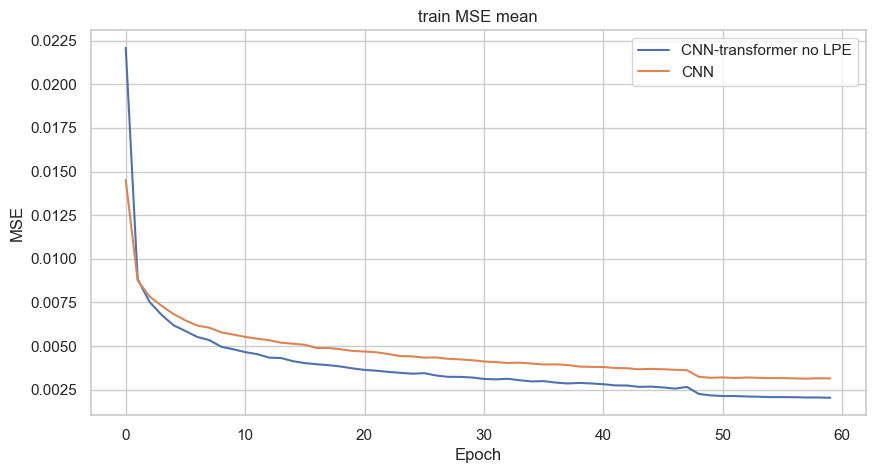

In [41]:
plott_mean(dicct_origin, ti='original vector', mode='train')

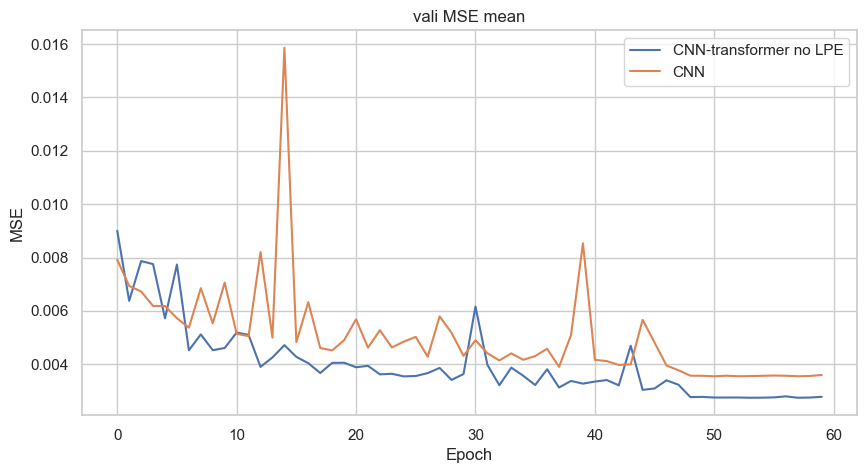

In [42]:
plott_mean(dicct_origin, ti='original vector', mode='vali')

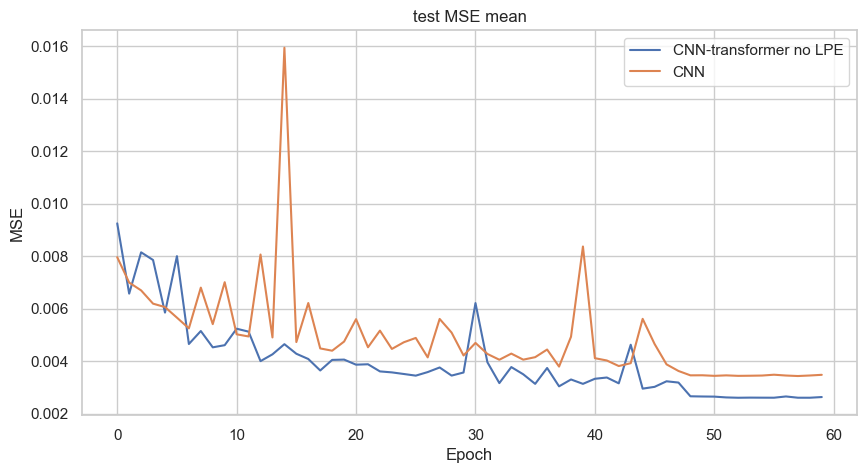

In [43]:
plott_mean(dicct_origin, ti='original vector', mode='test')